In [1]:
from extract_from_external_database import get_CHEBI_cpd_info,get_KEGG_cpd_info,get_PubChem_cpd_info
from extract_from_internal_database import get_taxonomy,get_property,get_concentrations,get_disease,get_reference,get_protein

In [6]:
import json
from tqdm import tqdm

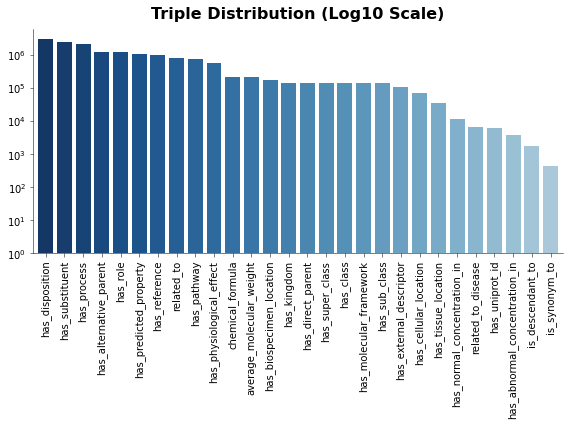

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

adict = {'has_substituent': 2566515, 'related_to': 830802, 'has_physiological_effect': 557938, 'has_role': 1234843, 'has_process': 2155839, 'has_disposition': 2974637, 'average_molecular_weight': 217878, 'chemical_formula': 217898, 'has_reference': 990415, 'has_external_descriptor': 110831, 'has_predicted_property': 1084460, 'has_alternative_parent': 1265905, 'has_molecular_framework': 144516, 'has_cellular_location': 70551, 'has_class': 145832, 'has_pathway': 769266, 'has_kingdom': 145936, 'has_direct_parent': 145936, 'has_abnormal_concentration_in': 3917, 'has_biospecimen_location': 179497, 'has_tissue_location': 35005, 'has_super_class': 145936, 'has_sub_class': 140754, 'has_normal_concentration_in': 11247, 'related_to_disease': 6635, 'has_uniprot_id': 6198, 'is_descendant_to': 1731, 'is_synonym_to': 437}

sorted_adict = dict(sorted(adict.items(), key=lambda x: x[1], reverse=True))

keys = list(sorted_adict.keys())
values = list(sorted_adict.values())

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=keys, y=np.log10(values), palette=sns.color_palette("Blues_r", len(adict)+15), ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(width=0.5)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(np.arange(0, np.ceil(np.log10(max(values)))), fontsize=10, labels=['$10^{{{}}}$'.format(int(x)) for x in np.arange(0, np.ceil(np.log10(max(values))))])

plt.title('Triple Distribution (Log10 Scale)', fontsize=16, fontweight='bold', pad=10)

ax.margins(x=0.01)

plt.tight_layout(pad=1.0)

# 将图表保存为SVG格式
plt.savefig('triple_distribution_log10.svg', format='svg')


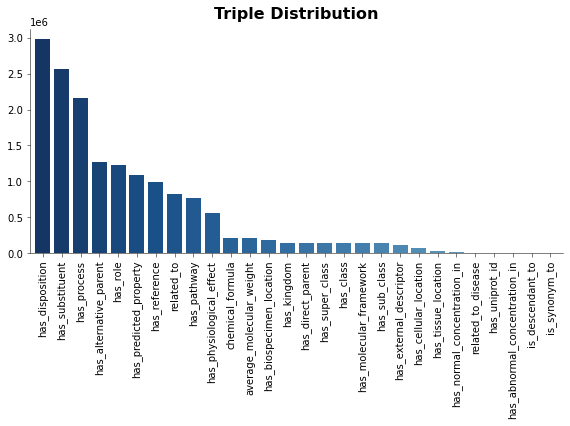

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

adict = {'has_substituent': 2566515, 'related_to': 830802, 'has_physiological_effect': 557938, 'has_role': 1234843, 'has_process': 2155839, 'has_disposition': 2974637, 'average_molecular_weight': 217878, 'chemical_formula': 217898, 'has_reference': 990415, 'has_external_descriptor': 110831, 'has_predicted_property': 1084460, 'has_alternative_parent': 1265905, 'has_molecular_framework': 144516, 'has_cellular_location': 70551, 'has_class': 145832, 'has_pathway': 769266, 'has_kingdom': 145936, 'has_direct_parent': 145936, 'has_abnormal_concentration_in': 3917, 'has_biospecimen_location': 179497, 'has_tissue_location': 35005, 'has_super_class': 145936, 'has_sub_class': 140754, 'has_normal_concentration_in': 11247, 'related_to_disease': 6635, 'has_uniprot_id': 6198, 'is_descendant_to': 1731, 'is_synonym_to': 437}

sorted_adict = dict(sorted(adict.items(), key=lambda x: x[1], reverse=True))

keys = list(sorted_adict.keys())
values = list(sorted_adict.values())

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=keys, y=values, palette=sns.color_palette("Blues_r", len(adict)*2), ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(width=0.5)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(np.arange(0, max(values)+250000, 500000), fontsize=10)

plt.title('Triple Distribution', fontsize=16, fontweight='bold', pad=10)

ax.margins(x=0.01)

plt.tight_layout(pad=1.0)

# 将图表保存为SVG格式
plt.savefig('triple_distribution.svg', format='svg')


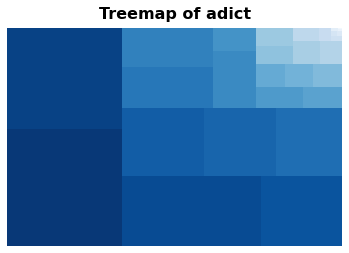

In [120]:
import matplotlib.pyplot as plt
import squarify

adict = {'has_substituent': 2566515, 'related_to': 830802, 'has_physiological_effect': 557938, 'has_role': 1234843, 'has_process': 2155839, 'has_disposition': 2974637, 'average_molecular_weight': 217878, 'chemical_formula': 217898, 'has_reference': 990415, 'has_external_descriptor': 110831, 'has_predicted_property': 1084460, 'has_alternative_parent': 1265905, 'has_molecular_framework': 144516, 'has_cellular_location': 70551, 'has_class': 145832, 'has_pathway': 769266, 'has_kingdom': 145936, 'has_direct_parent': 145936, 'has_abnormal_concentration_in': 3917, 'has_biospecimen_location': 179497, 'has_tissue_location': 35005, 'has_super_class': 145936, 'has_sub_class': 140754, 'has_normal_concentration_in': 11247, 'related_to_disease': 6635, 'has_uniprot_id': 6198, 'is_descendant_to': 1731, 'is_synonym_to': 437}

# 按值从大到小排序
sorted_adict = dict(sorted(adict.items(), key=lambda x: x[1], reverse=True))

keys = list(sorted_adict.keys())
values = list(sorted_adict.values())

# 定义颜色列表
# colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# 计算每个矩形的面积和颜色
norm = plt.Normalize(min(values), max(values))
colors = sns.color_palette("Blues_r", len(adict))
rects = squarify.plot(sizes=values, color=colors)

# 隐藏坐标轴
plt.axis('off')

# # 将标签放在矩形外面
# for i, rect in enumerate(rects):
#     x, y, w, h = rect
#     plt.text(x + w/2, y + h/2, list(sorted_adict.keys())[i], ha='center', va='center', fontsize=12)

# 添加标题
plt.title('Treemap of adict', fontsize=16, fontweight='bold', pad=10)

# 显示图表
plt.show()
